In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_hex
from matplotlib.ticker import FixedLocator
from plot_config import PlotConfig
import json
import bgp_qnm_fits as bgp
import seaborn as sns
import os 
import corner
from matplotlib.lines import Line2D

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [2]:
sim_id = "0010"
DATA_TYPE = 'news'
t0 = 100 
T = 100
INCLUDE_CHIF = False
INCLUDE_MF = False

with open(f'mode_content_files/mode_content_data_{sim_id}_WN.json', 'r') as f:
            mode_content_data_dict = json.load(f)
#full_modes_list = [list(map(tuple, inner)) for inner in mode_content_data_dict["modes"]]
#t0_vals = np.array(mode_content_data_dict['times'])

#t0_idx = np.where(t0_vals == t0)[0][0]
#modes = full_modes_list[t0_idx]

modes = [(2,2,0,1)]

#spherical_modes = [tuple(mode) for mode in mode_content_data_dict['spherical_modes']]

spherical_modes = [(2,2)]

target_modes = [(2,2)]

PLT_modes = target_modes
lams = [2 * l + 2 for l, _ in target_modes]

sim = bgp.SXS_CCE(sim_id, type=DATA_TYPE, lev="Lev5", radius="R2")
tuned_param_dict_GP = bgp.get_tuned_param_dict("GP", data_type=DATA_TYPE)[sim_id]

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


In [ ]:
fit = bgp.PLT_BGP_fit(
    sim.times,
    sim.h,
    modes,
    sim.Mf,
    sim.chif_mag,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    PLT_modes=PLT_modes,
    #lam_PLT_val=lams,
    nsteps=1000,
    nwalkers= 20, #np.max([2 * len(target_modes), 20]),
    T=T,
    spherical_modes=spherical_modes,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    data_type=DATA_TYPE
)

  0%|          | 0/1000 [00:00<?, ?it/s]/data/vault/rvnd2/python_envs/venv/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [01:12<00:00, 13.83it/s]


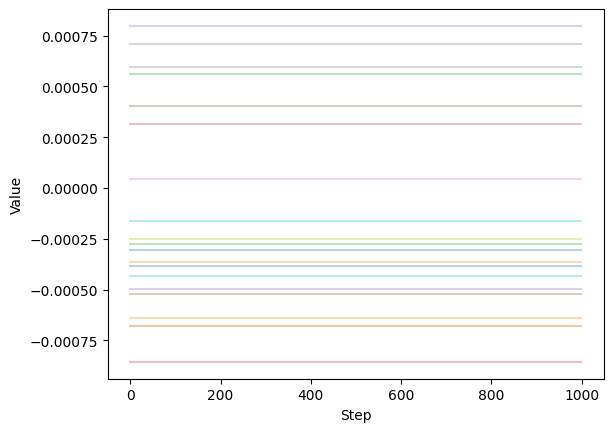

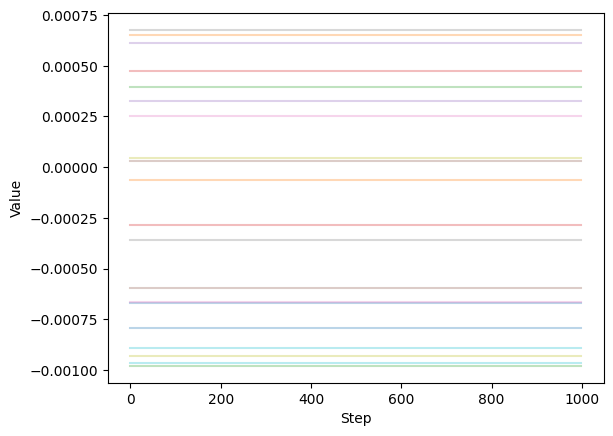

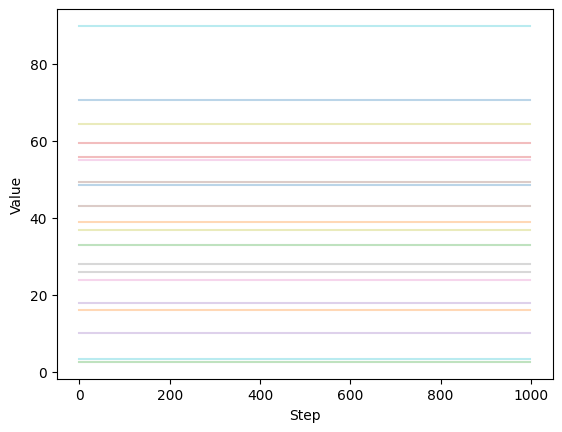

In [7]:
# mcmc_samples: shape (nsteps, nwalkers, ndim)
samples = fit.sampler.get_chain()  # shape: (nsteps, nwalkers, ndim)
param_names = ["A_PLT_real", "A_PLT_imag", "t_PLT"]   # Adjust as needed

for i in range(3):
    plt.figure()
    for walker in range(samples.shape[1]):
        plt.plot(samples[:, walker, i], alpha=0.3)
    #plt.axhline(true_values[i], color='red', linestyle='--', label='True value')
    #plt.title(f"Trace plot for parameter {i} ({param_names[i]})")
    plt.xlabel("Step")
    plt.ylabel("Value")
    plt.show()

burn_in = int(0.5 * samples.shape[0])
flat_samples = fit.sampler.get_chain(discard=burn_in, flat=True)  


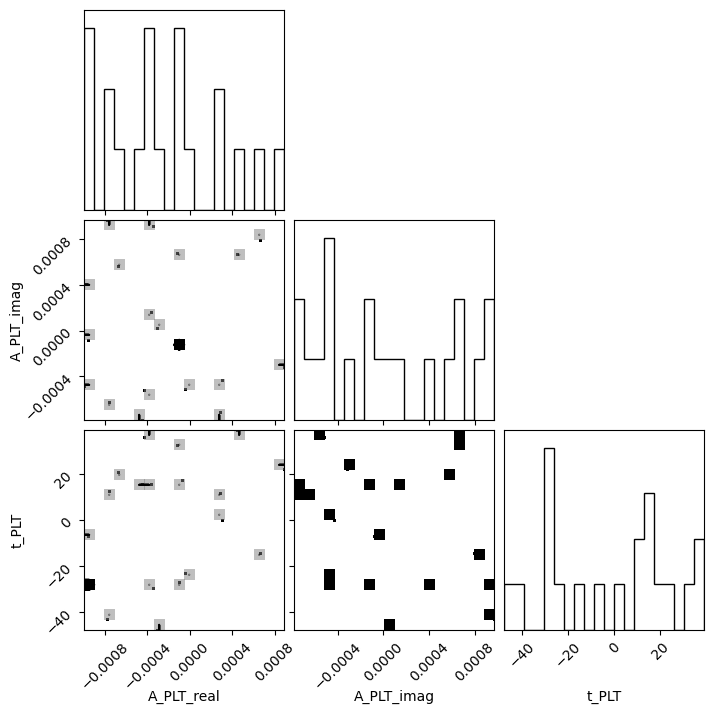

In [ ]:
corner.corner(flat_samples, labels=param_names)
plt.show()